In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
import numpy as np
import pandas as pd #imports the relevant modules
%matplotlib inline

In [4]:
plt.rcParams["figure.dpi"]=150
plt.rcParams["figure.facecolor"]="white"
plt.rcParams.update({'font.size': 18}) #updates figure parameters

# Band Structure

In [55]:
data = np.loadtxt('./Bands/silicene_bands.dat.gnu')
k_values = data[:, 0]
E_values = data[:, 1] #loads bands output file and assigns kpoint and energy data

In [56]:
num_bands = 8
k_values = np.array_split(k_values, num_bands)
E_values = np.array_split(E_values, num_bands)
E_fermi = -2.8774 #splits kpoint and energy data into 12 bands

In [57]:
for i in range(len(E_values)):
    E_values[i]-= E_fermi #shifts zero-point energy to Fermi level

In [58]:
VBM = max(E_values[3]) #valence band maximum is largest energy value of valence band
CBM = min(E_values[4]) #conduction band minimum is smallest energy value of conduction band
bandgap = CBM - VBM #should be near-zero for semi-metallic silicene

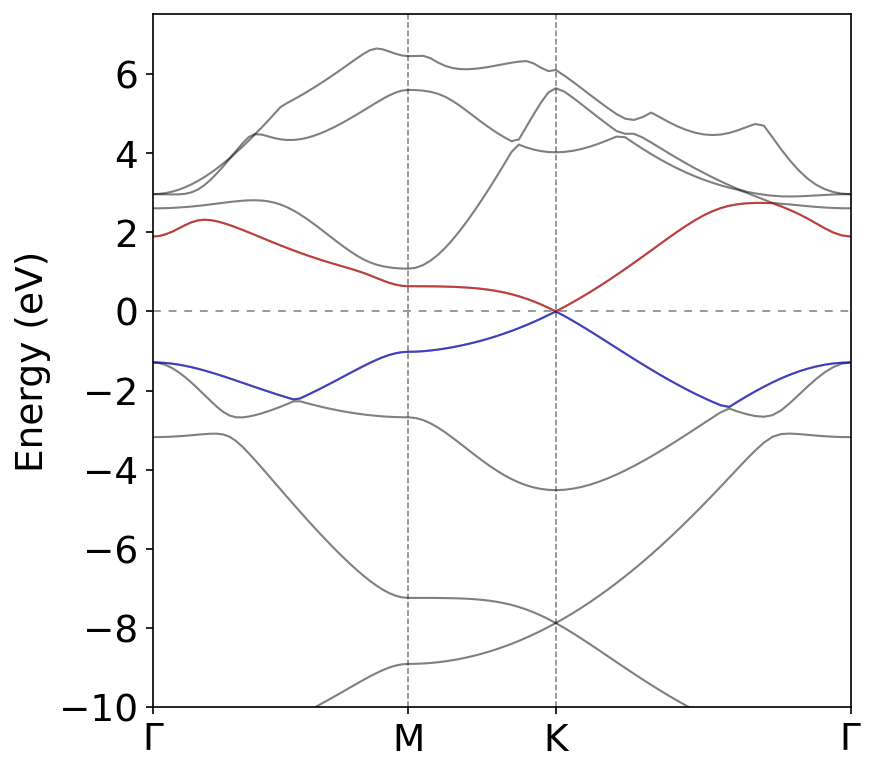

In [62]:
plt.figure(figsize=(6,6))
for i in range(num_bands):
    plt.plot(k_values[i], E_values[i], linewidth=1, alpha=0.5, color='k') #plots all bands

plt.plot(k_values[3], E_values[3], linewidth=1, alpha=0.5, color='b')
plt.plot(k_values[4], E_values[4], linewidth=1, alpha=0.5, color='r') #plots the valence and conduction bands 
                                                                      #as blue and red respectively

plt.xlim(min(k_values[0]), max(k_values[0]))
plt.ylim(-10, 7.5) #sets axes limits
# Fermi energy
plt.axhline(0, linestyle=(0, (5, 5)), linewidth=0.75, color='k', alpha=0.5) #plots a dashed line at the Fermi 
                                                                            #level
# plt.axhline(VBM, linestyle=(0, (5, 5)), linewidth=0.75, color='r', alpha=0.5)
# plt.axhline(CBM, linestyle=(0, (5, 5)), linewidth=0.75, color='b', alpha=0.5) #plots dashed lines at the VBM 
                                                                                #and CBM which approximately 
                                                                                #coincide for silicene 
# High symmetry k-points (check bands_pp.out)
plt.axvline(0.5774, linewidth=0.75, ls='--', color='k', alpha=0.5) 
plt.axvline(0.9107, linewidth=0.75, ls='--', color='k', alpha=0.5) #plots dashed lines at high symmetry points 
                                                                   #of the Brillouin zone
    
plt.xticks(ticks= [0, 0.5774, 0.9107, 1.5773], \
           labels=['$\Gamma$', 'M', 'K', '$\Gamma$'])
plt.ylabel("Energy (eV)")
# plt.savefig(f'{images_dir}/SiliceneBands.svg', bbox_inches = 'tight') #saves output plot to file
plt.show()